## Test 1. My first data science project

### In this lab you will apply the concepts and techniques developed in previous sessions. You are expected to work on the assignments on your own DURING the duration of the lab.

### You are expected to submit the code developed as well as a brief description of your findings and insights.

### This lab represents 30% of the total marking of the module¶

TO DO: Description of the challenge

In this challenge we analyze the pollutant parameter levels across differnt cities in the world

### Let's load and install some libraries

In [1]:
!pip install py-openaq

  Created wheel for py-openaq: filename=py_openaq-1.1.0-py3-none-any.whl size=9037 sha256=b8df822ce26800c2709df4735de9b0640e4267f0b5edfb49bbf580f1bacf6ef5
  Stored in directory: /home/jovyan/.cache/pip/wheels/b7/64/46/caec8d415716f8ebeb1e95f11d8c83aff852f41ab6eb1dc98f
Successfully built py-openaq


In [2]:
import pandas as pd
import seaborn as sns
import openaq
import matplotlib as mpl
import matplotlib.pyplot as plt

### Let's load the dataset

In [3]:
airQualityCities=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458_OLD/master/data/airQualityCities.csv')

In [4]:
airQualityCities.sample(5)

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
2360,2021-10-10 23:00:00,Southend-on-Sea,pm25,20.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-10 22:00:00+00:00,51.544206,0.678408
12563,2021-10-04 11:00:00,FR04329,pm10,41.10,b'\xc2\xb5g/m\xc2\xb3',FR,Paris,2021-10-04 09:00:00+00:00,48.838603,2.412785
23939,2021-09-30 06:15:00,"R K Puram, Delhi - DPCC",pm25,0.00,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-30 00:45:00+00:00,28.563262,77.186937
6115,2021-10-09 03:00:00,FR04329,pm10,24.50,b'\xc2\xb5g/m\xc2\xb3',FR,Paris,2021-10-09 01:00:00+00:00,48.838603,2.412785
37047,2021-09-28 20:15:00,"Chandni Chowk, Delhi - IITM",o3,54.59,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.656756,77.227234


In [5]:
airQualityCities.head()

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
0,2021-10-12 23:00:00,US Diplomatic Post: New Delhi,pm25,-999.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-10-12 17:30:00+00:00,28.635760,77.224450
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
3,2021-10-12 18:00:00,Tower Hamlets Roadside,no2,36.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.522530,-0.042155
4,2021-10-12 18:00:00,London Eltham,no2,15.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766


In [6]:
airQualityCities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37087 entries, 0 to 37086
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date.local             37087 non-null  object 
 1   location               37087 non-null  object 
 2   parameter              37087 non-null  object 
 3   value                  37087 non-null  float64
 4   unit                   37087 non-null  object 
 5   country                37087 non-null  object 
 6   city                   37087 non-null  object 
 7   date.utc               37087 non-null  object 
 8   coordinates.latitude   37087 non-null  float64
 9   coordinates.longitude  37087 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.8+ MB


In [7]:
airQualityCities.groupby('city').count()

,date.local,location,parameter,value,unit,country,date.utc,coordinates.latitude,coordinates.longitude
city,,,,,,,,,
Beijing,300,300,300,300,300,300,300,300,300
Berlin,2248,2248,2248,2248,2248,2248,2248,2248,2248
Delhi,16265,16265,16265,16265,16265,16265,16265,16265,16265
London,5772,5772,5772,5772,5772,5772,5772,5772,5772
Madrid,7400,7400,7400,7400,7400,7400,7400,7400,7400
Paris,5102,5102,5102,5102,5102,5102,5102,5102,5102


In [8]:
airQualityCities.groupby('parameter').count()

,date.local,location,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
parameter,,,,,,,,,
co,3248,3248,3248,3248,3248,3248,3248,3248,3248
no2,10417,10417,10417,10417,10417,10417,10417,10417,10417
o3,7401,7401,7401,7401,7401,7401,7401,7401,7401
pm10,7206,7206,7206,7206,7206,7206,7206,7206,7206
pm25,5783,5783,5783,5783,5783,5783,5783,5783,5783
so2,3032,3032,3032,3032,3032,3032,3032,3032,3032


In [9]:
airQualityCities.describe()

,value,coordinates.latitude,coordinates.longitude
count,37087.000000,37087.000000,37087.000000
mean,94.827929,38.804088,34.538858
std,410.059445,9.746081,39.780293
min,-9999.000000,28.470691,-71.217639
25%,9.800000,28.651478,-0.125254
50%,22.710000,40.312850,2.412785
75%,48.000000,48.868866,77.170633
max,10000.000000,52.653269,116.470000


In [10]:
airQualityCities.columns

Index(['date.local', 'location', 'parameter', 'value', 'unit', 'country',
       'city', 'date.utc', 'coordinates.latitude', 'coordinates.longitude'],
      dtype='object')

## Question 1. Find cities with levels of O3 larger than 120 µg/m³ 

Let's create a dataset where we have the parameter o3 for all cities. Thus we create a subset of dataset airQualityCities where the parameter is O3

In [20]:
airQualityCities.shape

(37087, 10)

In [13]:
airQualityO3 = airQualityCities[airQualityCities['parameter'] == 'o3']
airQualityO3.head()

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
13,2021-10-12 18:00:00,London Harlington,o3,34.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614
14,2021-10-12 18:00:00,Thurrock,o3,25.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.477070,0.317969
15,2021-10-12 18:00:00,London Haringey Priory Park South,o3,35.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.584128,-0.125254
19,2021-10-12 18:00:00,Southend-on-Sea,o3,34.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
20,2021-10-12 18:00:00,London Eltham,o3,24.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766


In [26]:
highO3 = airQualityO3[airQualityO3['value'] > 120]

In [31]:
highO3

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
26683,2021-09-29 22:45:00,"Jahangirpuri, Delhi - DPCC",o3,162.20,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 17:15:00+00:00,28.732820,77.170633
27279,2021-09-29 21:15:00,"Ashok Vihar, Delhi - DPCC",o3,125.70,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 15:45:00+00:00,28.695381,77.181665
28675,2021-09-29 17:45:00,"DTU, Delhi - CPCB",o3,263.70,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 12:15:00+00:00,28.750050,77.111261
28868,2021-09-29 17:15:00,"DTU, Delhi - CPCB",o3,147.20,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 11:45:00+00:00,28.750050,77.111261
29656,2021-09-29 15:15:00,"Aya Nagar, Delhi - IMD",o3,272.67,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:45:00+00:00,28.470691,77.109936
29718,2021-09-29 14:45:00,"Chandni Chowk, Delhi - IITM",o3,295.15,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:15:00+00:00,28.656756,77.227234
29733,2021-09-29 14:45:00,"Aya Nagar, Delhi - IMD",o3,278.88,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:15:00+00:00,28.470691,77.109936
30080,2021-09-29 13:45:00,"IHBAS, Dilshad Garden, Delhi - CPCB",o3,148.23,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 08:15:00+00:00,28.681174,77.302523
36164,2021-09-28 22:15:00,"Ashok Vihar, Delhi - DPCC",o3,205.50,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 16:45:00+00:00,28.695381,77.181665
36327,2021-09-28 22:00:00,"North Campus, DU, Delhi - IMD",o3,121.33,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 16:30:00+00:00,28.657381,77.158545


In [125]:
highO3.groupby('city').mean()

,value,coordinates.latitude,coordinates.longitude
city,,,
Delhi,202.056,28.656038,77.166466
Madrid,124.000,40.300830,-3.458890


We calculate the mean value of O3 by cities

In [127]:
highO3['city'].unique()

array(['Delhi', 'Madrid'], dtype=object)

Thus we find two ciites with higher than 120 microgram/metercube levels of O3. They are Delhi and Madrid

## Question 2. Which city has the cleanest air ?
### Tip: consider adapting the following example: https://seaborn.pydata.org/examples/grouped_boxplot.html

We group the data by cities, parameters and calculate the aggregate values for the comparison, since values give us the intensity of pollution in different parameters

In [34]:
airQualityCities.groupby(['city','parameter'])['value'].mean()

city     parameter
Beijing  pm25        -780.380000
Berlin   co           267.555556
         no2           16.033369
         o3            14.868796
         pm10          18.440835
         pm25          12.687855
Delhi    co           984.832721
         no2           21.598024
         o3            24.051291
         pm10          88.123526
         pm25          21.445833
         so2            8.670405
London   no2           18.745915
         o3            36.179387
         pm10          12.079461
         pm25           7.069494
         so2            1.596386
Madrid   co           360.816327
         no2           23.337947
         o3            44.216649
         pm10          14.466007
         pm25           8.878225
         so2            2.397490
Paris    no2           34.055988
         o3            41.492475
         pm10          21.637607
         pm25          12.278495
Name: value, dtype: float64

In [35]:
airQualityCities.pivot_table(columns = 'parameter', index = 'city', values = 'value', aggfunc = 'mean')

parameter,co,no2,o3,pm10,pm25,so2
city,,,,,,
Beijing,NaN,NaN,NaN,NaN,-780.380000,NaN
Berlin,267.555556,16.033369,14.868796,18.440835,12.687855,NaN
Delhi,984.832721,21.598024,24.051291,88.123526,21.445833,8.670405
London,NaN,18.745915,36.179387,12.079461,7.069494,1.596386
Madrid,360.816327,23.337947,44.216649,14.466007,8.878225,2.397490
Paris,NaN,34.055988,41.492475,21.637607,12.278495,NaN


We can see that for different parameters the levels of pollution for different cities are different.

In [130]:
### let's calculate the aggregate mean value of all the parameters for different cities
airQualityCities.groupby('city')['value'].mean().sort_values()

city
Beijing   -780.380000
London      19.402807
Berlin      25.593749
Paris       31.001098
Madrid      45.850196
Delhi      189.610243
Name: value, dtype: float64

### Thus we can see that Beijing followed by London has the lowest mean value of different pollutant parameters. But Beijing has most of the parameters undocumented. So we can say that London is the cleanest amongst all parameter documented cities.

In [47]:
sns.set(rc = {"figure.figsize":(14.7,10.27)})

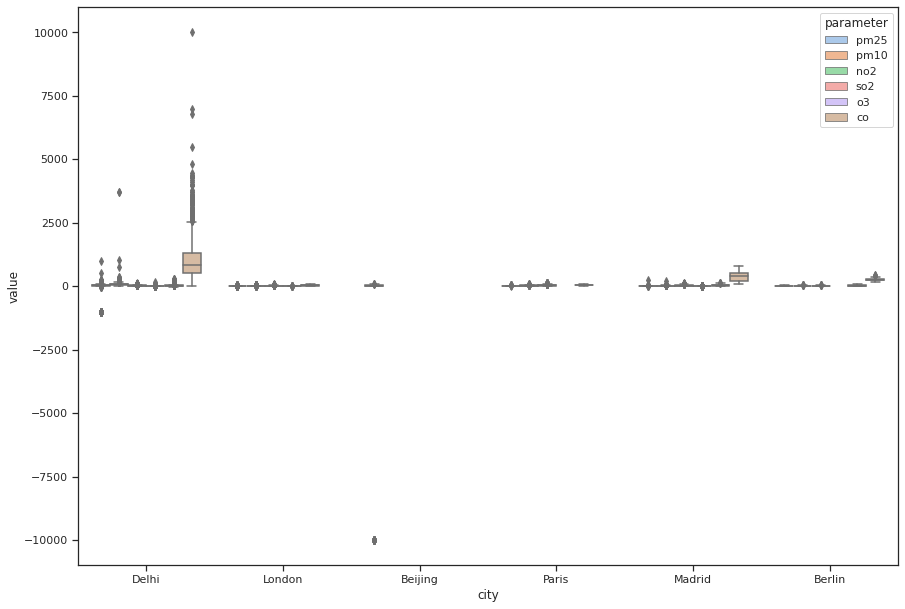

In [48]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x= 'city', y = 'value', hue = 'parameter', data = airQualityCities)

From the box plot we see that London has lower values in different paraameters.

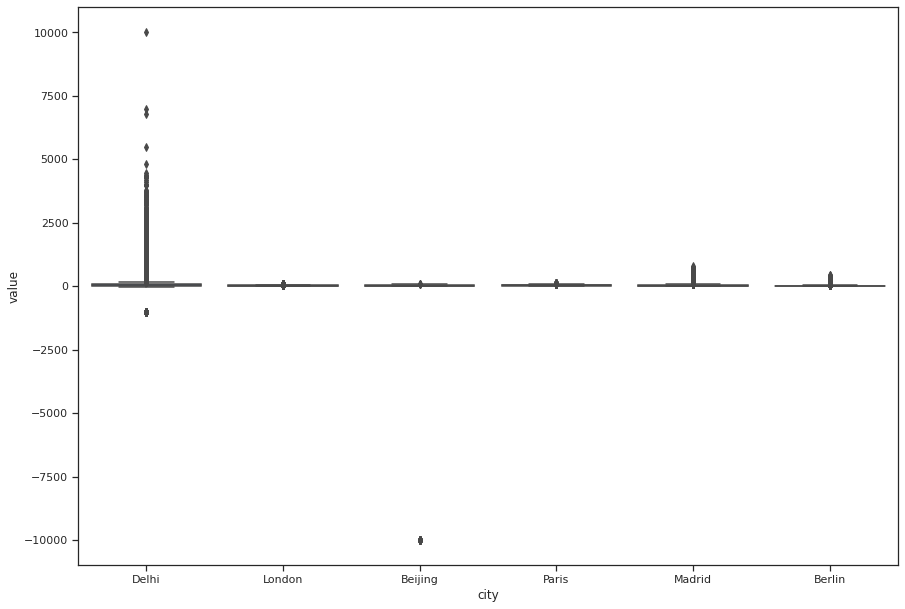

In [71]:
sns.boxplot(x= 'city', y = 'value',
    palette='deep', data = airQualityCities)

## Question 3. Which location is the most poluted in London ?

In [50]:
### Let's subset the dataset for the city of London
London = airQualityCities[airQualityCities['city'] == 'London']

In [51]:
London

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
3,2021-10-12 18:00:00,Tower Hamlets Roadside,no2,36.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.522530,-0.042155
4,2021-10-12 18:00:00,London Eltham,no2,15.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
5,2021-10-12 18:00:00,London Harlington,pm10,17.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614
...,...,...,...,...,...,...,...,...,...,...
36973,2021-09-28 16:00:00,London Haringey Priory Park South,no2,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.584128,-0.125254
36979,2021-09-28 16:00:00,London Haringey Priory Park South,o3,57.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.584128,-0.125254
36982,2021-09-28 16:00:00,London Eltham,pm10,7.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.452580,0.070766
36984,2021-09-28 16:00:00,Thurrock,no2,4.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.477070,0.317969


Grouping by different locations and calculating mean values for different parameters.

In [53]:
Londongrouped = London.groupby(['location', 'parameter'])['value'].mean()
Londongrouped

location                           parameter
London Eltham                      no2          13.364259
                                   o3           33.454789
                                   pm10         10.614747
                                   pm25          7.262673
London Haringey Priory Park South  no2          17.434932
                                   o3           40.198813
London Harlington                  no2          20.729642
                                   o3           36.493151
                                   pm10         10.040956
                                   pm25          6.187713
Southend-on-Sea                    no2          15.294985
                                   o3           39.855030
                                   pm10         11.887906
                                   pm25          7.707965
Thurrock                           no2          20.865192
                                   o3           30.346313
                           

In [58]:
Londongrouped.sort_values()

location                           parameter
Thurrock                           so2           1.596386
London Harlington                  pm25          6.187713
London Eltham                      pm25          7.262673
Southend-on-Sea                    pm25          7.707965
London Harlington                  pm10         10.040956
London Eltham                      pm10         10.614747
Southend-on-Sea                    pm10         11.887906
London Eltham                      no2          13.364259
Thurrock                           pm10         14.970501
Southend-on-Sea                    no2          15.294985
London Haringey Priory Park South  no2          17.434932
London Harlington                  no2          20.729642
Thurrock                           no2          20.865192
Tower Hamlets Roadside             no2          24.288514
Thurrock                           o3           30.346313
London Eltham                      o3           33.454789
London Harlington          

We can see that  London Harlington has higher levels of O3 and no2 parameters. Thurrock and 'Tower Hamlets Roadside' have high levels of no2. Southend-on-Sea has high O3 level.

In [129]:
### Grouping the locations by the average values of all the parameters.
London.groupby('location')['value'].mean().sort_values()

location
London Eltham                        16.832881
Thurrock                             17.024240
London Harlington                    18.375527
Southend-on-Sea                      18.670849
Tower Hamlets Roadside               24.288514
London Haringey Priory Park South    29.631161
Name: value, dtype: float64

From the groupby table we see that the locations 'London Haringey Priory Park South', 'Tower Hamlets Roadside' and 'Southend-on-Sea'have the top 3 highest values of the parameters. They are the most polluted.

## The most polluted location is - 'London Haringey Priory Park South'


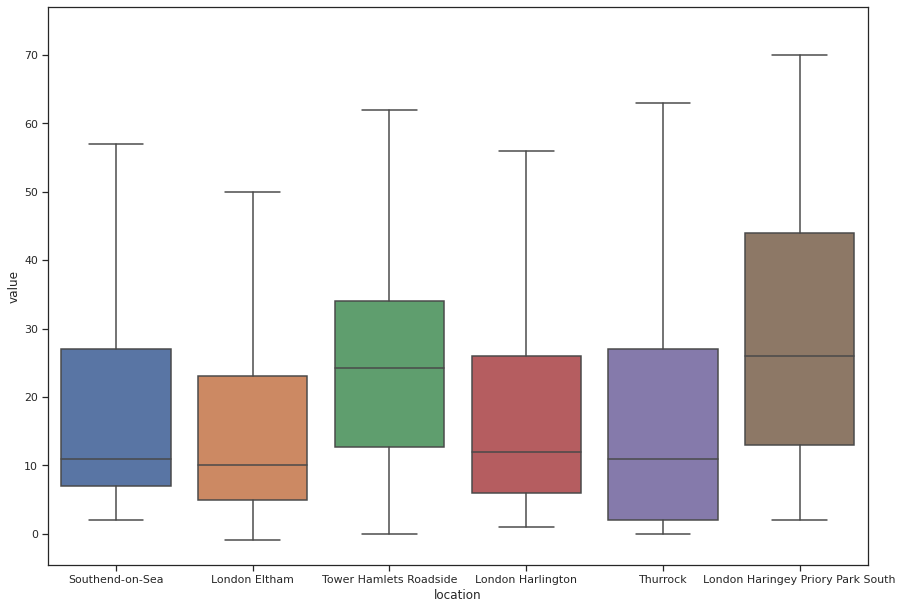

In [69]:
sns.boxplot(x='location', y = 'value', fliersize=0,
    palette='deep',data = London)

## Question 4. Plot the evolution of air polution accross time in locations in London
### Tip: Consider using Relplot: https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

In [62]:
London.head()

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
3,2021-10-12 18:00:00,Tower Hamlets Roadside,no2,36.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.522530,-0.042155
4,2021-10-12 18:00:00,London Eltham,no2,15.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
5,2021-10-12 18:00:00,London Harlington,pm10,17.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614


In [72]:
London['Datetime'] = pd.to_datetime(London['date.local'])

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
London.head()

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude,Datetime
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408,2021-10-12 18:00:00
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766,2021-10-12 18:00:00
3,2021-10-12 18:00:00,Tower Hamlets Roadside,no2,36.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.522530,-0.042155,2021-10-12 18:00:00
4,2021-10-12 18:00:00,London Eltham,no2,15.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766,2021-10-12 18:00:00
5,2021-10-12 18:00:00,London Harlington,pm10,17.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614,2021-10-12 18:00:00


In [78]:
London['Datetime'].max() - London['Datetime'].min()

Timedelta('14 days 02:00:00')

In [84]:
London['Datetime'].max().hour

18

Thus we see that the data is taken across a period of 14 days.
We can see the evolution across all the timepoints of 'Datetime' or we can see the evolution across the days in the 14 days or we can see the hours of days.

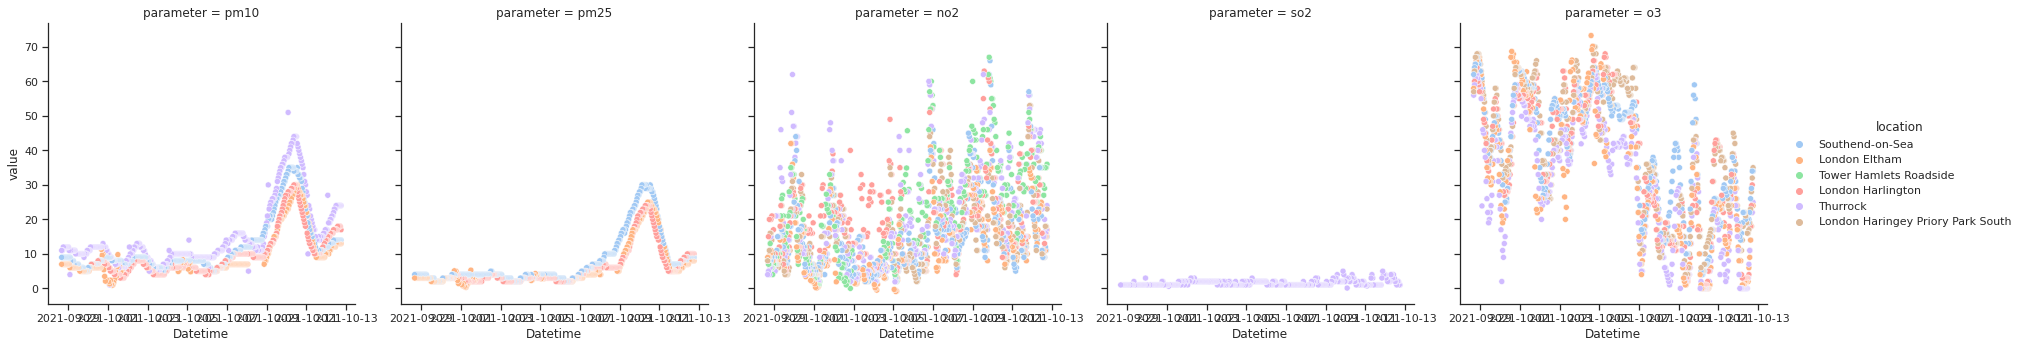

In [76]:
sns.relplot(x = 'Datetime', y = 'value', hue = 'location', col = 'parameter', data = London)

In [92]:
London['day'] = London.Datetime.dt.day
London['hour'] = London.Datetime.dt.hour

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
London.head()

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude,Datetime,day,hour
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408,2021-10-12 18:00:00,12,18
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766,2021-10-12 18:00:00,12,18
3,2021-10-12 18:00:00,Tower Hamlets Roadside,no2,36.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.522530,-0.042155,2021-10-12 18:00:00,12,18
4,2021-10-12 18:00:00,London Eltham,no2,15.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766,2021-10-12 18:00:00,12,18
5,2021-10-12 18:00:00,London Harlington,pm10,17.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614,2021-10-12 18:00:00,12,18


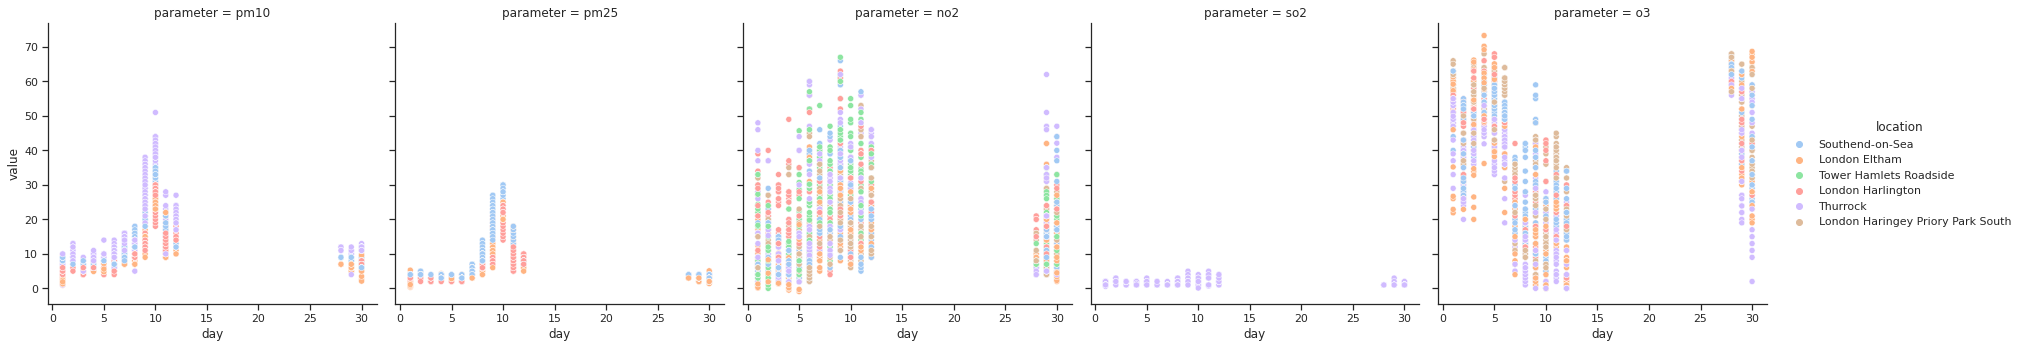

In [94]:
sns.relplot(x = 'day', y = 'value', hue = 'location', col = 'parameter', data = London)

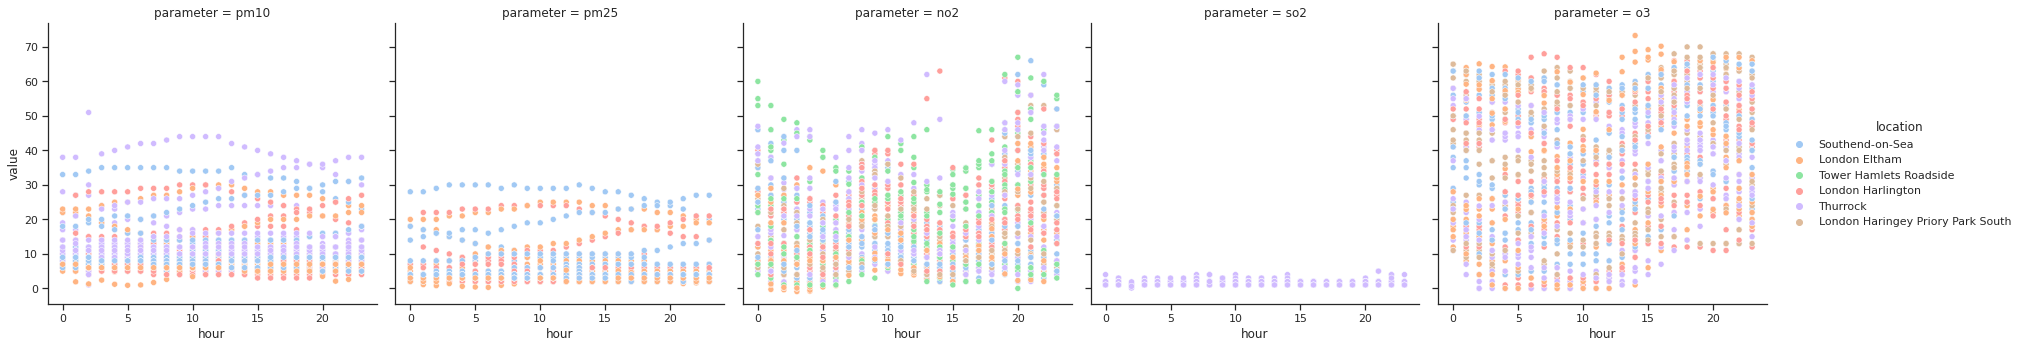

In [95]:
sns.relplot(x = 'hour', y = 'value', hue = 'location', col = 'parameter', data = London)

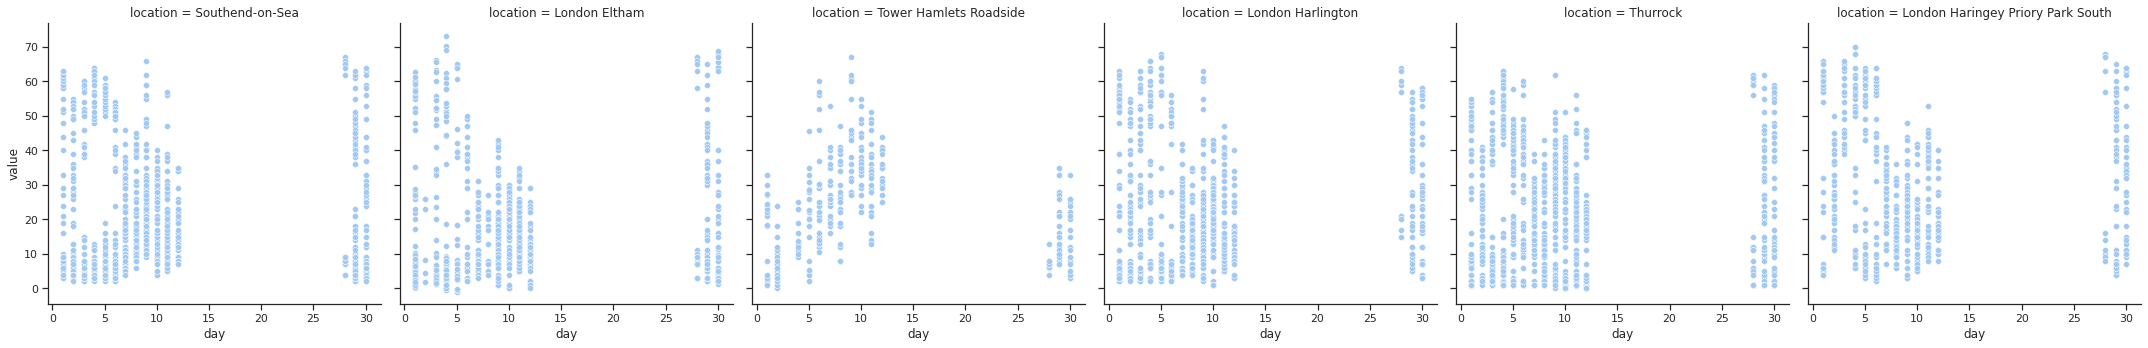

In [97]:
sns.relplot(x = 'day', y = 'value', col = 'location', data = London)

## Question 5: Is there any relationship between levels of PM25 and PM10 in London?

In [27]:
### response: they are strongly correlated

We create a pivot table of parameters across different timepoints for London and store it in Londonparameterpivot

In [102]:
Londonparameterpivot = London.pivot_table(index = 'parameter', columns = 'Datetime', values = 'value')

In [103]:
Londonparameterpivot

Datetime,2021-09-28 16:00:00,2021-09-28 17:00:00,2021-09-28 18:00:00,2021-09-28 19:00:00,2021-09-28 20:00:00,2021-09-28 21:00:00,2021-09-28 22:00:00,2021-09-28 23:00:00,2021-09-29 00:00:00,2021-09-29 01:00:00,...,2021-10-12 09:00:00,2021-10-12 10:00:00,2021-10-12 11:00:00,2021-10-12 12:00:00,2021-10-12 13:00:00,2021-10-12 14:00:00,2021-10-12 15:00:00,2021-10-12 16:00:00,2021-10-12 17:00:00,2021-10-12 18:00:00
parameter,,,,,,,,,,,,,,,,,,,,,
no2,7.40,8.833333,9.666667,10.600000,12.683333,10.833333,9.666667,9.166667,7.800000,7.0,...,35.500000,36.500000,28.833333,19.833333,14.166667,13.666667,15.833333,17.833333,18.666667,21.666667
o3,58.25,61.800000,64.200000,65.250000,65.600000,64.400000,63.800000,62.800000,62.750000,59.8,...,9.200000,8.600000,9.750000,8.600000,10.800000,14.400000,19.000000,23.400000,28.000000,30.400000
pm10,9.00,9.000000,9.333333,9.333333,9.333333,9.333333,9.333333,9.333333,9.333333,9.0,...,16.250000,16.500000,16.500000,17.000000,17.000000,17.250000,17.250000,17.250000,17.250000,17.000000
pm25,3.50,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.5,...,8.333333,8.666667,8.666667,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
so2,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,3.000000,4.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000


In [104]:
type(Londonparameterpivot)

pandas.core.frame.DataFrame

In [112]:
import numpy as np

In [116]:
pm10np = np.array(Londonparameterpivot.loc['pm10'])
pm25np = np.array(Londonparameterpivot.loc['pm25'])
np.corrcoef(pm10np, pm25np)

array([[1.        , 0.98809144],
       [0.98809144, 1.        ]])

Numpy correlation coefficient shows that theya re highly correlated

In [120]:
Londonparameterpivot.T.corr()

parameter,no2,o3,pm10,pm25,so2
parameter,,,,,
no2,1.000000,-0.503551,0.412305,0.392070,0.415769
o3,-0.503551,1.000000,-0.638904,-0.621807,-0.271051
pm10,0.412305,-0.638904,1.000000,0.988091,0.296148
pm25,0.392070,-0.621807,0.988091,1.000000,0.285296
so2,0.415769,-0.271051,0.296148,0.285296,1.000000


From the correlation matrix also we see that there is a high correlation between pm10 and p25

In [122]:
corr = Londonparameterpivot.T.corr()

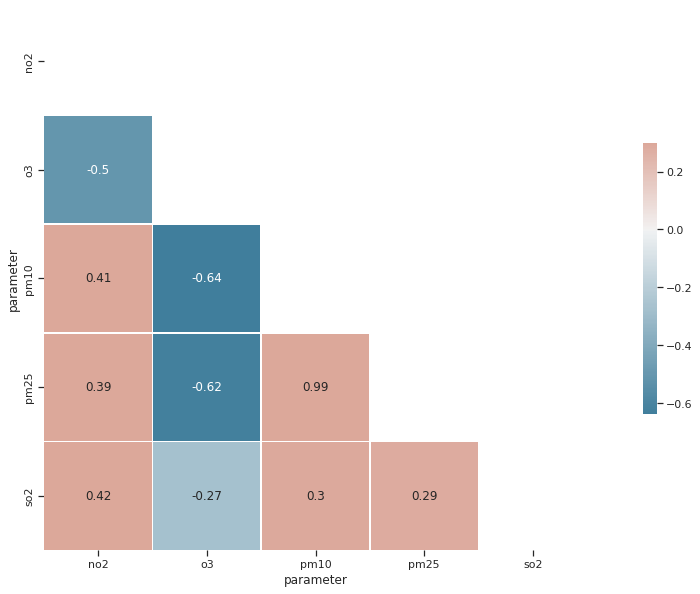

In [123]:
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)